# IVF patient response - Exploratory Data Analysis

**Objective:** Analyze patterns in IVF patient data to understand factors influencing response categories (low/optimal/high)**Dataset:** Reproductive medicine patient records with clinical features

**Dataset:** Reproductive medicine patient records with clinical features

**Author:** Doua Ben Rejeb

## 1. Setup and data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Config of viz style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [5]:
df = pd.read_csv("C:/Users/MSI/Downloads/Dataset/data/processed/patients_cleaned.csv")
print("DATASET OVERVIEW\n")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumns: {list(df.columns)}")

df.head()

DATASET OVERVIEW

Total Records: 501
Total Features: 16

Columns: ['patient_id', 'cycle_number', 'Age', 'Protocol', 'AMH', 'n_Follicles', 'E2_day5', 'AFC', 'Patient Response', 'AMH_Age_ratio', 'AFC_Follicles_ratio', 'E2_per_follicle', 'Age_group', 'AMH_category', 'Protocol_encoded', 'Patient Response_encoded']


,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,AMH_Age_ratio,AFC_Follicles_ratio,E2_per_follicle,Age_group,AMH_category,Protocol_encoded,Patient Response_encoded
0,25001,1,37.0,flexible antagonist,1.87,16.0,930.13,12.0,high,0.050541,0.705882,54.713529,35-40,Normal,7,0
1,25002,2,24.0,fix antag,1.18,5.0,1799.86,12.0,low,0.049167,2.000000,299.976667,<30,Normal,2,1
2,25003,1,32.0,fix antag,1.35,5.0,846.31,12.0,low,0.042188,2.000000,141.051667,30-35,Normal,2,1
3,25004,1,24.0,flex anta,1.81,18.0,351.81,12.0,optimal,0.075417,0.631579,18.516316,<30,Normal,5,2
4,25005,2,24.0,flex anta,1.04,9.0,606.70,12.0,low,0.043333,1.200000,60.670000,<30,Normal,5,1


## 2. Data quality assessment

In [8]:
# Data types and statistics
print("\nFEATURE STATISTICS\n")
print(df.describe().T)


FEATURE STATISTICS

                          count          mean         std           min  \
patient_id                501.0  25251.000000  144.770508  25001.000000   
cycle_number              501.0      1.441118    0.659565      1.000000   
Age                       501.0     31.738523    4.648601     24.000000   
AMH                       501.0      2.385509    1.416665      0.100000   
n_Follicles               501.0     16.448104   10.192021      1.000000   
E2_day5                   501.0    899.832934  471.548010     29.160000   
AFC                       501.0     12.000000    0.000000     12.000000   
AMH_Age_ratio             501.0      0.078019    0.049696      0.002326   
AFC_Follicles_ratio       501.0      1.188572    1.250830      0.258065   
E2_per_follicle           501.0     88.149419  105.573395      1.041429   
Protocol_encoded          501.0      3.718563    2.331230      0.000000   
Patient Response_encoded  501.0      1.207585    0.807974      0.000000   

   

## 3. Target variable analysis

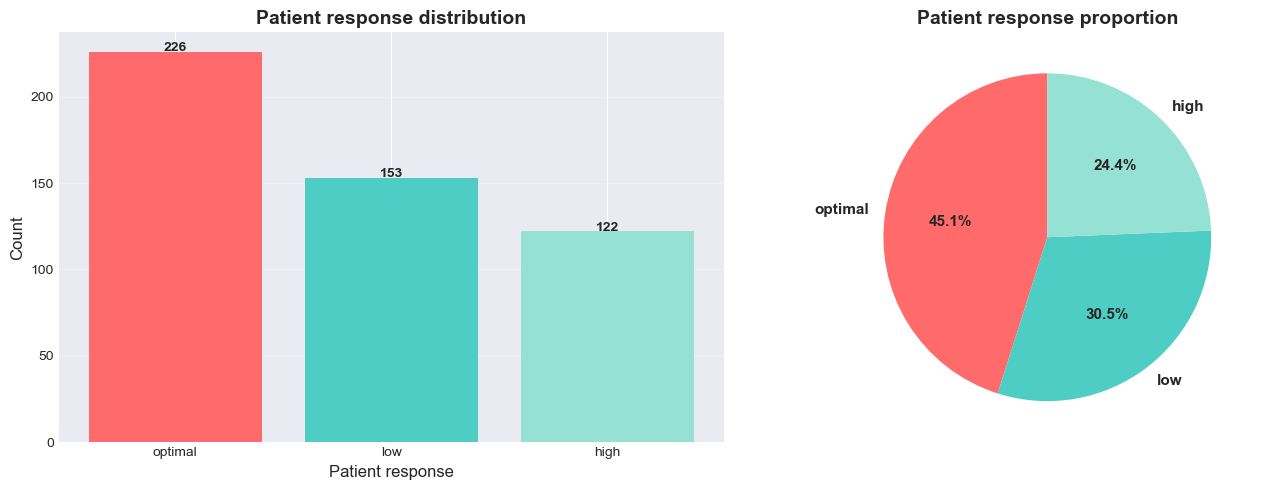

In [16]:
# Patient Response distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

response_counts = df['Patient Response'].value_counts()
axes[0].bar(response_counts.index, response_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
axes[0].set_xlabel('Patient response', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Patient response distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(response_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']
axes[1].pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Patient response proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Univariate analysis - Numeric features

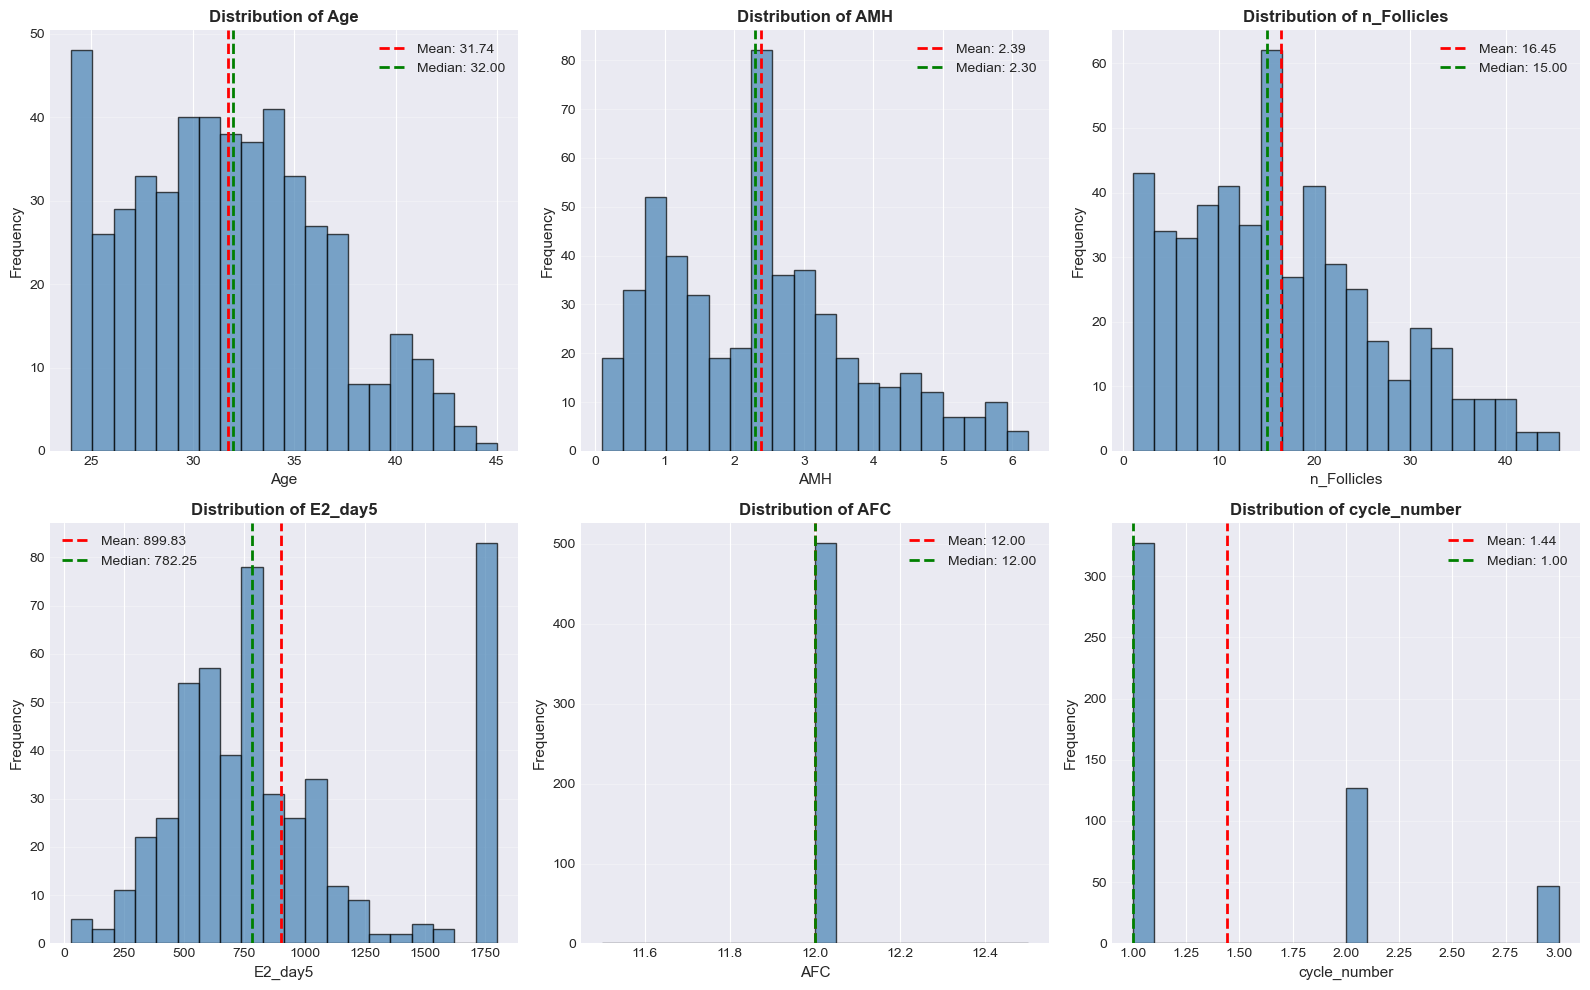

In [21]:
# Distribution of numeric features
numeric_features = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC', 'cycle_number']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    # Histogram with KDE
    axes[i].hist(df[feature], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

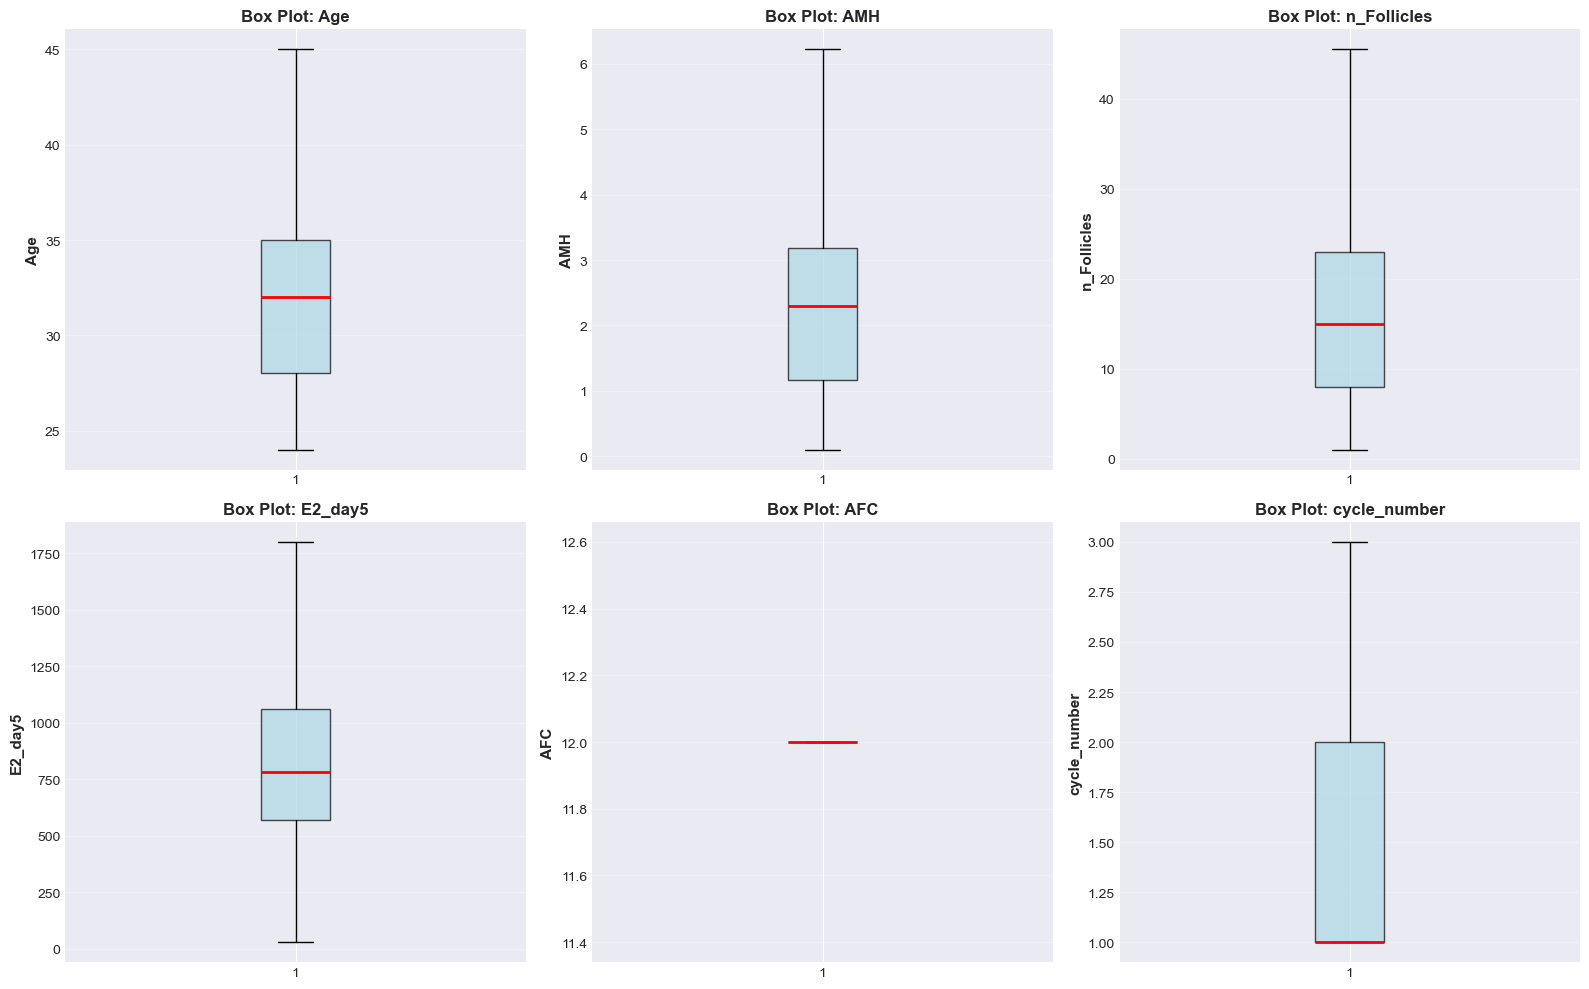

In [25]:
# viz distribution and quartiles 
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    axes[i].boxplot(df[feature], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_ylabel(feature, fontsize=11, fontweight='bold')
    axes[i].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Categorical features analysis

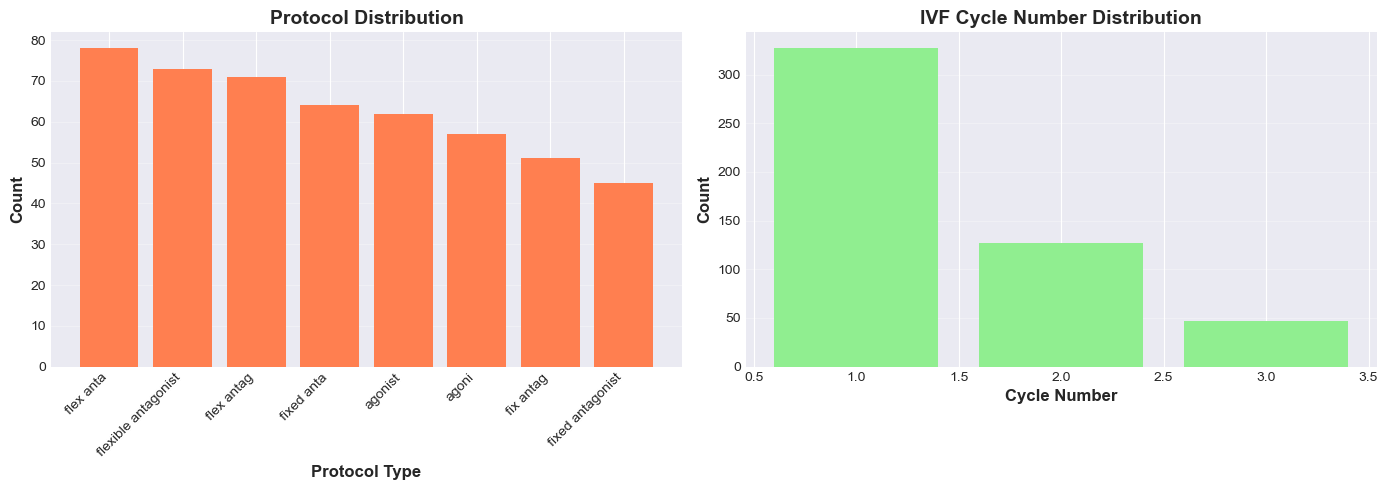

In [26]:
# Protocol distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

protocol_counts = df['Protocol'].value_counts()
axes[0].bar(range(len(protocol_counts)), protocol_counts.values, color='coral')
axes[0].set_xticks(range(len(protocol_counts)))
axes[0].set_xticklabels(protocol_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('Protocol Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Protocol Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Cycle number distribution
cycle_counts = df['cycle_number'].value_counts().sort_index()
axes[1].bar(cycle_counts.index, cycle_counts.values, color='lightgreen')
axes[1].set_xlabel('Cycle Number', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('IVF Cycle Number Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
# normalize protocol types 
!pip install rapidfuzz

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00


In [37]:
from rapidfuzz import fuzz, process

def group_modalities(modalities, threshold=85):
    canonical = []
    mapping = {}

    for m in modalities:
        m_clean = m.lower().strip()

        if not canonical:
            canonical.append(m_clean)
            mapping[m] = m_clean
            continue

        result = process.extractOne( # extractOne returns: (match, score, match_index)
            m_clean,
            canonical,
            scorer=fuzz.token_sort_ratio
        )
        if result is None:
            canonical.append(m_clean)
            mapping[m] = m_clean
            continue

        best_match, score, idx = result

        if score >= threshold:
            mapping[m] = best_match
        else:
            canonical.append(m_clean)
            mapping[m] = m_clean

    return mapping
modalities = df["Protocol"].unique().tolist()
mapping = group_modalities(modalities, threshold=80)
df["protocol_grouped"] = df["Protocol"].map(mapping)

<Axes: title={'center': 'Protocol Distribution'}, xlabel='protocol_grouped', ylabel='Count'>

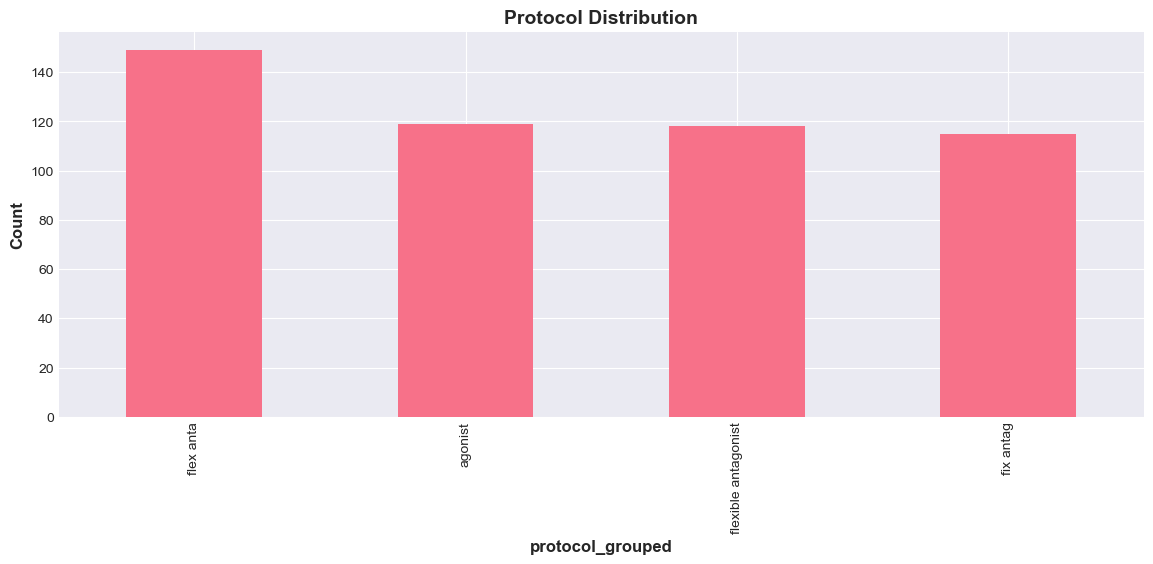

In [40]:
fig, axes = plt.subplots(figsize=(14, 5))
axes.set_xlabel('Protocol Type', fontsize=12, fontweight='bold')
axes.set_ylabel('Count', fontsize=12, fontweight='bold')
axes.set_title('Protocol Distribution', fontsize=14, fontweight='bold')
df["protocol_grouped"].value_counts().plot(kind="bar")

## 6. Bivariate analysis - Features vs target

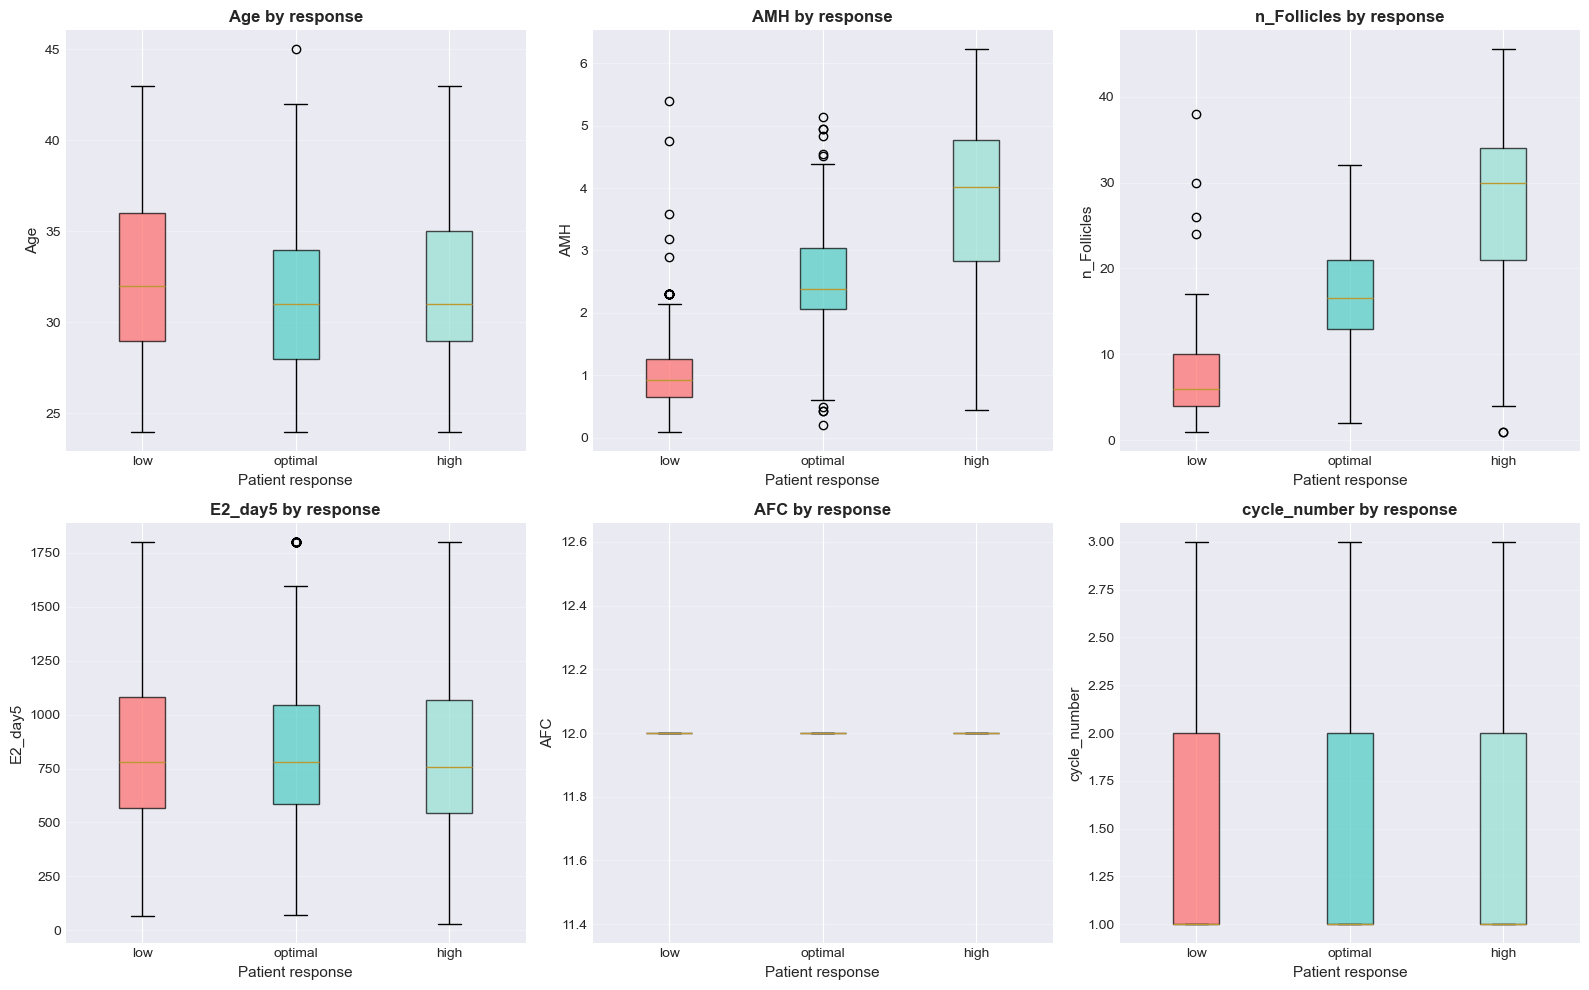

In [48]:
# Numeric features vs Patient Response (Box plots)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

response_order = ['low', 'optimal', 'high']
colors_palette = {'low': '#FF6B6B', 'optimal': '#4ECDC4', 'high': '#95E1D3'}

for i, feature in enumerate(numeric_features):
    df_plot = df[[feature, 'Patient Response']]
    
    # Create box plot for each response category
    data_by_response = [df_plot[df_plot['Patient Response'] == resp][feature].values 
                        for resp in response_order]
    
    bp = axes[i].boxplot(data_by_response, labels=response_order, patch_artist=True)
    
    # Color boxes
    for patch, response in zip(bp['boxes'], response_order):
        patch.set_facecolor(colors_palette[response])
        patch.set_alpha(0.7)
    
    axes[i].set_xlabel('Patient response', fontsize=11)
    axes[i].set_ylabel(feature, fontsize=11)
    axes[i].set_title(f'{feature} by response', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Analysis and interpretation :**

- Age by Response :

    Median age is slightly higher in the low response group.
    
    Optimal and high responders tend to be younger.
    
    **Interpretation:** Younger patients might respond better to IVF stimulation.

- AMH by Response :

    Clear trend: low responders have the lowest AMH levels; high responders have the highest.
    
    AMH is a strong predictor of ovarian reserve.
    
    **Interpretation:** Higher AMH is associated with a better ovarian response.

- n_Follicles by Response :

    Number of follicles increases from low → optimal → high responders.
    
    **Interpretation:** Patients with more follicles generally have a higher ovarian response.

- E2_day5 by Response :

    Estradiol (E2) levels at day 5 are slightly higher in low responders, but distributions overlap.
    
    **Interpretation:** Early estradiol rise may correlate moderately with ovarian response.


**Overall interpretation:**
- Strongest predictors of response: AMH and number of follicles.
 -Moderate predictor: Age.
- Non-informative in this dataset: AFC and cycle number.
- High responders are typically younger with higher AMH and more follicles.

### Statistical tests - ANOVA for numeric features vs response

In [74]:
print("\nSTATISTICAL TESTS: ANOVA (features vs response)\n")

for feature in numeric_features:
    # Get data for each response category
    groups = [df[df['Patient Response'] == resp][feature] for resp in response_order]
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    significance = "High significance" if p_value < 0.001 else "Low significance" if p_value < 0.01 else "Moderate significance" if p_value < 0.05 else "ns"
    print(f"{feature:15} | F-stat: {f_stat:8.3f} | p-value: {p_value:.4e} | {significance}")


STATISTICAL TESTS: ANOVA (features vs response)

Age             | F-stat:    3.447 | p-value: 3.2605e-02 | Moderate significance
AMH             | F-stat:  260.173 | p-value: 4.4069e-78 | High significance
n_Follicles     | F-stat:  276.626 | p-value: 1.6038e-81 | High significance
E2_day5         | F-stat:    0.707 | p-value: 4.9346e-01 | ns
AFC             | F-stat:      nan | p-value: nan | ns
cycle_number    | F-stat:    3.672 | p-value: 2.6123e-02 | Moderate significance


As mentioned earlier, AMH and number of follicles are the strongest variables for patients response to diagnosis, followed by teh patient's Age and the cycle number

## 7. Correlation Analysis

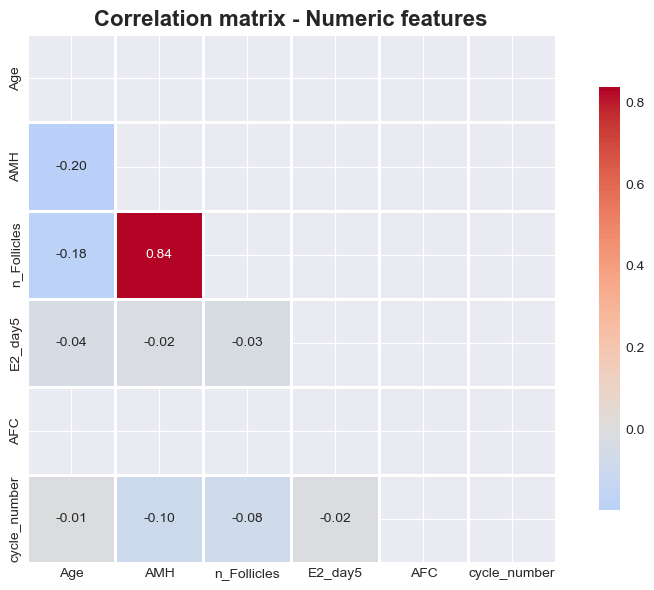

In [66]:
# Correlation matrix for numeric features
numeric_df = df[numeric_features].copy()
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, mask=mask)
plt.title('Correlation matrix - Numeric features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. "Protocol" vs "Response" analysis

In [79]:
ct = pd.crosstab(df['protocol_grouped'], df['Patient Response'], normalize='index') * 100
ct

Patient Response,high,low,optimal
protocol_grouped,,,
agonist,21.008403,31.932773,47.058824
fix antag,29.565217,30.434783,40.000000
flex anta,24.832215,30.872483,44.295302
flexible antagonist,22.033898,28.813559,49.152542


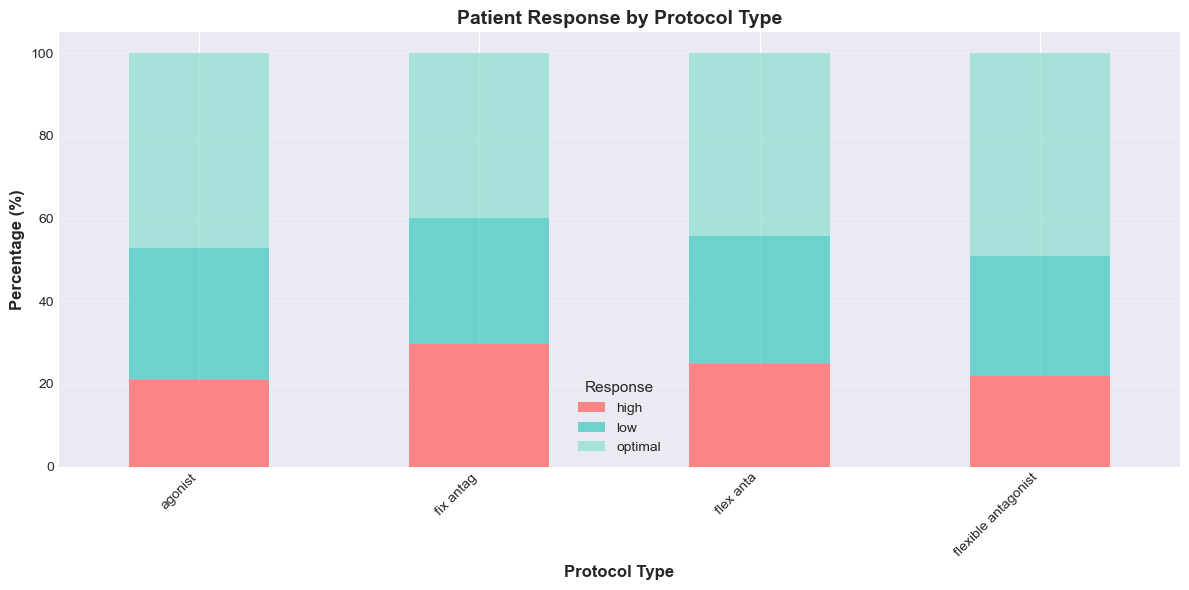

In [75]:
# Stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(12, 6), 
        color=['#FF6B6B', '#4ECDC4', '#95E1D3'], alpha=0.8)
plt.xlabel('Protocol Type', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Patient Response by Protocol Type', fontsize=14, fontweight='bold')
plt.legend(title='Response', title_fontsize=11, fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The distribution of responses is similar enough across all groups that the protocols and the small differences observed in the bar chart are likely due to random chance.

-> We can't reliably use the choice of protocol type (Agonist vs. Antagonist) to predict whether an individual patient will have a High, Low, or Optimal response.

### Chi-square test

In [77]:
ct_counts = pd.crosstab(df['Protocol'], df['Patient Response'])
chi2, p_value, dof, expected = chi2_contingency(ct_counts)

print("\nCHI-SQUARE TEST: Protocol vs Response\n")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


CHI-SQUARE TEST: Protocol vs Response

Chi-square statistic: 12.1446
p-value: 5.9469e-01
Degrees of freedom: 14
Significant: No


Based on the Chi-square test, the protocol type is not a statistically significant metric to predict patient response as p-value< 5%

## 9. AMH analysis (our key biomarker)

### AMH distribution by response

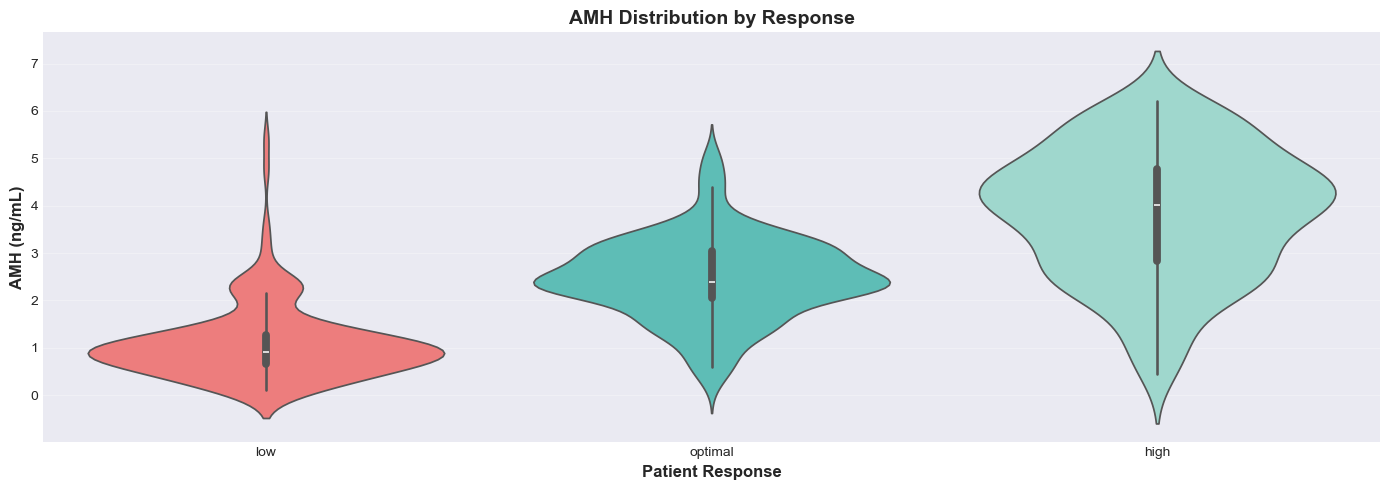

In [82]:
fig, axes = plt.subplots(figsize=(14, 5))

sns.violinplot(data=df, x='Patient Response', y='AMH', order=response_order, 
               palette=colors_palette, ax=axes)
axes.set_xlabel('Patient Response', fontsize=12, fontweight='bold')
axes.set_ylabel('AMH (ng/mL)', fontsize=12, fontweight='bold')
axes.set_title('AMH Distribution by Response', fontsize=14, fontweight='bold')
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [88]:
print("\nAMH STATISTICS BY RESPONSE\n")
print(df.groupby('Patient Response')['AMH'].describe())


AMH STATISTICS BY RESPONSE

                  count      mean       std   min     25%   50%    75%   max
Patient Response                                                            
high              122.0  3.836148  1.366738  0.45  2.8250  4.01  4.765  6.22
low               153.0  1.096536  0.793860  0.10  0.6600  0.92  1.270  5.40
optimal           226.0  2.475044  0.866430  0.21  2.0575  2.38  3.040  5.13


**Analysis of AMH distribution (ng/mL) by patient's response :**

- **Low response correlates with low AMH:** The distribution for the Low response group is heavily skewed towards the lowest AMH values, with a median below 1.0 ng/mL.

    This confirms the clinical expectation: patients with very low ovarian reserve (low AMH) are highly likely to be low responders to ovarian stimulation drugs.

- **High Response Correlates with High AMH:** The High response group has the highest median AMH and the largest overall distribution, reaching over 7.0 ng/mL.

    This confirms that patients with higher ovarian reserve (high AMH) are at a greater risk of an exaggerated response, or High Response.

- **Optimal Response is Intermediate:** The Optimal response distribution sits between the Low and High groups, confirming that a *mid-range AMH level is most conducive to achieving a desired, controlled (optimal) ovarian response*.

In summary, this analysis strongly validates AMH as the key pre-treatment biomarker for predicting a patient's ovarian response to IVF stimulation drugs.

### AMH vs Follicle count by Response

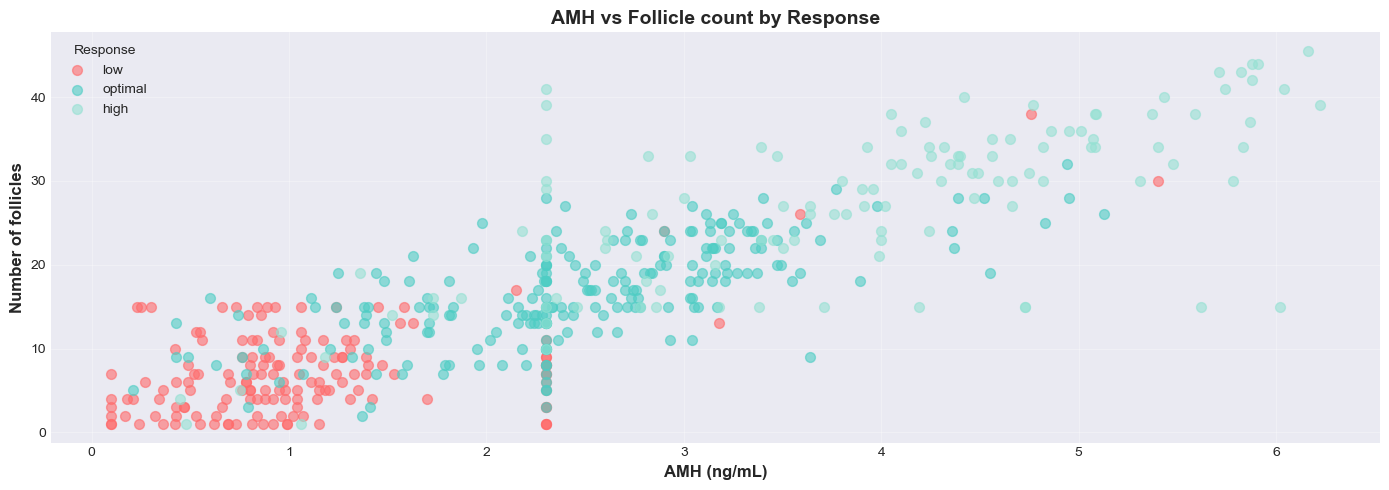

In [85]:
fig, axes = plt.subplots(figsize=(14, 5))

# AMH vs n_Follicles colored by response
for response in response_order:
    subset = df[df['Patient Response'] == response]
    axes.scatter(subset['AMH'], subset['n_Follicles'], 
                   label=response, alpha=0.6, s=50, color=colors_palette[response])

axes.set_xlabel('AMH (ng/mL)', fontsize=12, fontweight='bold')
axes.set_ylabel('Number of follicles', fontsize=12, fontweight='bold')
axes.set_title('AMH vs Follicle count by Response', fontsize=14, fontweight='bold')
axes.legend(title='Response', fontsize=10)
axes.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Anti-Müllerian Hormone (AMH) level and the number of follicles are **strongly and positively correlated**.

**Observations:**

- Positive correlation: As AMH increases, the number of follicles generally increases.
- Patients with higher AMH tend to have more follicles, which aligns with biological expectations.

- Response categories:

    - Low response (red points): Clustered at lower AMH (<1.8 ng/mL) and lower follicle counts (<15).
    
    - Optimal response (teal points): Spread across **moderate to high AMH (2–6 ng/mL) and follicle counts (~11–27), showing the ideal range for ovarian response**.
    
    - High response (light green points): Scattered at higher AMH levels, sometimes with very high follicle counts (>25–40), indicating patients at risk for over-response or hyperstimulation.
    
    - Some points with AMH around 2–3 ng/mL show both low and optimal responses, suggesting variability in follicle count even at similar AMH levels. This indicates *other factors (age, AFC, BMI) may influence response*.


**Data distribution:**

The majority of patients fall into the low-to-optimal response range.

Very high responses are relatively rare but clearly visible at the upper AMH and follicle counts.

**Quick Interpretation:**

- Most low responders have low AMH and follicle counts.

- Optimal responders dominate the mid-range, while very high responders are limited to high AMH and follicle counts.

- There's some overlap, highlighting that AMH alone cannot fully predict ovarian response.

## 10. Age analysis

### Age distribution by response

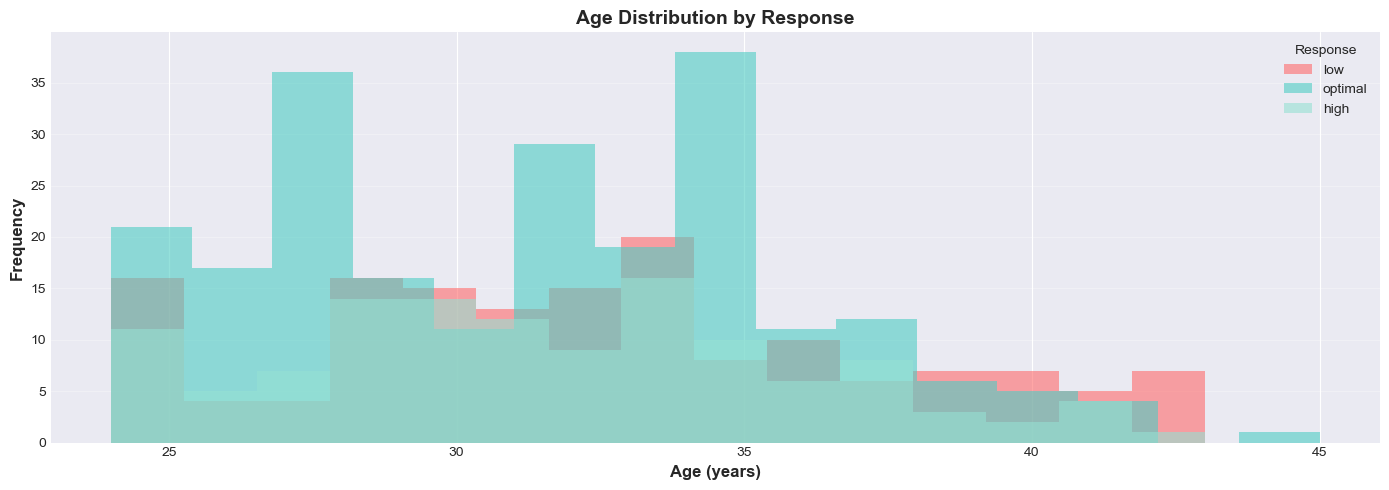

In [94]:
fig, axes = plt.subplots(figsize=(14, 5))
for response in response_order:
    subset = df[df['Patient Response'] == response]['Age']
    axes.hist(subset, bins=15, alpha=0.6, label=response, color=colors_palette[response])

axes.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
axes.set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes.set_title('Age Distribution by Response', fontsize=14, fontweight='bold')
axes.legend(title='Response', fontsize=10)
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Analysis :**
- Optimal Response (teal): The bulk of optimal responses are concentrated in younger age groups, peaking strongly **between 26 and 35 years old**. There is a sharp drop-off in optimal response frequency after age 35.

- Low Response (coral): Low responses are present across the age spectrum but show a notable increase in frequency in the older age bins (approximately **38 to 44 years**). This confirms that *low response becomes a more common outcome in older patients*.

- High Response (light green): High responses are most frequent in the younger groups, particularly **from 24 to 35 years**. This suggests *younger ovaries are generally more sensitive to stimulation*.

**Overall Trend:** The total frequency of patients decreases significantly after age 35, and the proportion of low responders increases as patients age.

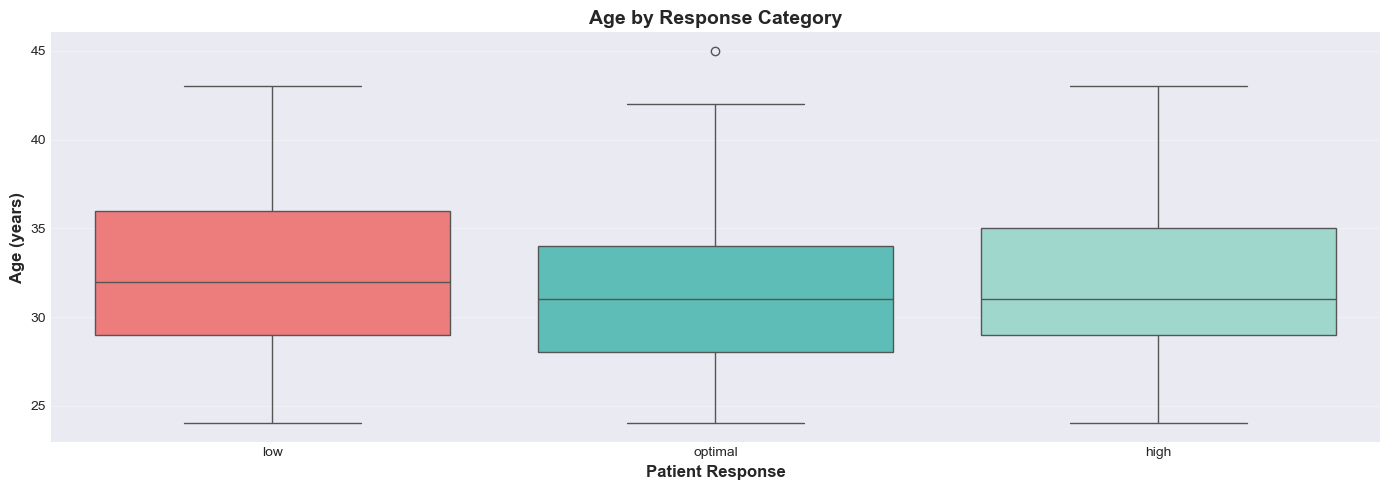

In [95]:
fig, axes = plt.subplots(figsize=(14, 5))

sns.boxplot(data=df, x='Patient Response', y='Age', order=response_order,
           palette=colors_palette, ax=axes)
axes.set_xlabel('Patient Response', fontsize=12, fontweight='bold')
axes.set_ylabel('Age (years)', fontsize=12, fontweight='bold')
axes.set_title('Age by Response Category', fontsize=14, fontweight='bold')
axes.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

Here, we compare the central tendency and spread of age for each response group:
- Low Response:
        
        Median Age: Appears to be the highest (around 32 years).
        -> Patients who experience a low response tend to be the oldest group on average.

- Optimal Response:
        
        Median Age: Appears to be the lowest (around 31 years).
        -> Patients achieving an optimal response tend to be the youngest group, which aligns with the histogram data.

- High Response:

        Median Age: Sits between the other two groups (around 31.5 years).
        -> The age distribution for high responders is very similar to optimal responders, indicating that both good and exaggerated high responses are more likely to occur in younger patients.

## 11. Key insights summary

1. PREDICTIVE FEATURES:
   - AMH is a strong predictor of ovarian response
   - Age shows inverse relationship with response (older → lower response)
   - Number of follicles correlates with AMH levels

2. CLINICAL IMPLICATIONS:
   - Low AMH (<1.0 ng/mL) patients may need higher stimulation doses
   - High AMH (>3.5 ng/mL) patients require careful monitoring
   - Protocol selection should consider AMH and age together

3. MODEL DEVELOPMENT CONSIDERATIONS:
   - Focus on AMH, Age, AFC as key features
   - Consider interaction features (AMH × Age, AFC × Protocol)
   - More research to do a reliable clinical predictions and take into account outliers and class imbalances 